<img src="images/header.png">

# Алгоритмы интеллектуальной обработки больших объемов данных

## Лекция 5. Классификация и регрессия 

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Сегодня на лекции

* Задачи классификации и регрессии
* Оценка качетва классификации

### Нужно отметиться на лекции

https://sphere.mail.ru/

## Задачи классификации и регрессии
<img src="images/omnomnom.jpg">

## Классификация: интуиция
#### Задача
Разработать алгоритм, позволяющий определить класс произвольного объекта из
некоторго множества
* Дана обучающая выборка, в которой для каждого объекта известен класс

## Регрессия: интуиция
#### Задача
Разработать алгоритм, позволяющий предсказать числовую характеристику
произвольного объекта из некоторого множества
* Дана обучающая выборка, в которой для каждого объекта известно значение
числовой характеристики

## Обучение с учителем / supervised learning

**Дано.** Признаковые описания $N$ объектов $\mathbf{x} = (x_1, \ldots, x_m) \in \mathcal{X}$, образующие тренировочный набор данных $X$, и значения целевой переменной $y = f(\mathbf{x}) \in \mathcal{Y}$ для каждого объекта из $X$. 

**Найти.** Для семейства параметрических функций 
$$
H = \{h(\mathbf{x, \mathbf{\theta}}) = y: \mathcal{X} \times \Theta \rightarrow \mathcal{Y}\},
$$
найти значение вектора параметров $\theta^*$, такое что $h^*(\mathbf{x}) = h(\mathbf{x}, \theta^*)$ наилучшим образом приближает целевую функцию.

$Y \in \{C_1, C_2, \ldots, C_N\}$ - задача классификации  
$Y \in [a, b] \subset \mathcal{R}$ - задача регресии

### $L = R + E + O$

* **R** Выдвигаем гипотезу насчет **модели** - семейства параметрических функций вида
$$
H = \{h(\mathbf{x}, \theta) = y: \mathcal{X} \times \Theta \rightarrow \mathcal{Y} \},
$$
которая могла бы решить нашу задачу (represenation)

* **E** Выбиаем критерий, на основании которого будем оценивать качество предсказания (evaluation)

* **O** Выбираем наилучшие параметры модели $\theta^*$, используя **алгоритм обучения**
$$
A(X, Y) : (\mathcal{X}, \mathcal{Y})^N \rightarrow \Theta
$$
(optimization)

* **D** Используя полученную модель $h^*(\mathbf{x}) = h(\mathbf{x}, \theta^*)$, решаем, как классифицировать неизвестные объекты (decision making)



### Цены на недвижимость 

#### [California Housing data set](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html)

In [4]:
import sklearn.datasets.california_housing as ch
import mpl_toolkits.basemap as bm
import numpy as np
import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
dataset = ch.fetch_california_housing()

X = dataset.data
Y = dataset.target

print "Loaded data set with %d objects and %d variables" % (Y.shape[0], X.shape[1])
print "Coordinates ll=(%.3f, %3.f), ur=(%.3f, %.3f)" % (X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max())

Loaded data set with 20640 objects and 8 variables
Coordinates ll=(-124.350,  33), ur=(-114.310, 41.950)


In [8]:
print dataset.DESCR

print dataset.feature_names

California housing dataset.

The original database is available from StatLib

    http://lib.stat.cmu.edu/

The data contains 20,640 observations on 9 variables.

This dataset contains the average house value as target variable
and the following input variables (features): average income,
housing average age, average rooms, average bedrooms, population,
average occupation, latitude, and longitude in that order.

References
----------

Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
Statistics and Probability Letters, 33 (1997) 291-297.


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


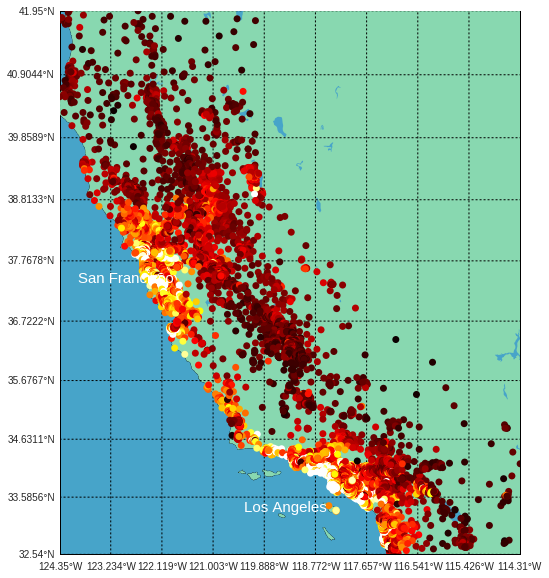

In [14]:
pl.figure(figsize=(10, 10))

lllon, lllat, urlon, urlat = X[:, -1].min(), X[:, -2].min(), X[:, -1].max(), X[:, -2].max()

m = bm.Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [pl.cm.hot(int((y - Y.min()) / (Y.max() - Y.min()) * 256)) for y in Y]
m.scatter(X[:, -1], X[:, -2], latlon=True, zorder=3, lw=0, c=colors)

pl.annotate('San Francisco', xy=(0.04, 0.5), xycoords='axes fraction', color='white', size=15)
pl.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

pl.show()

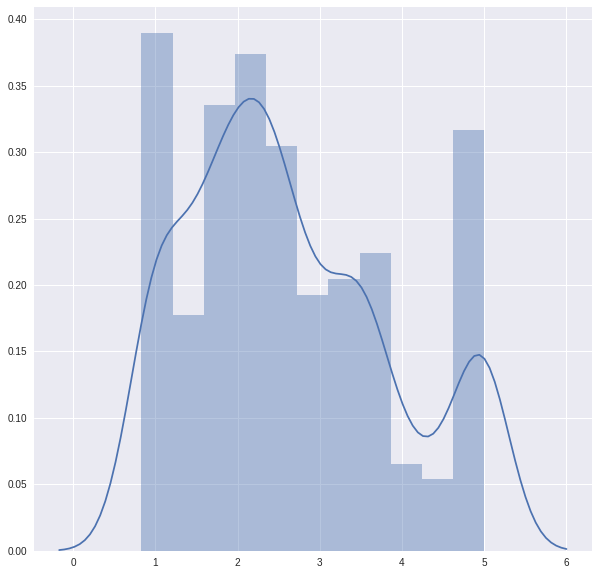

In [64]:
lllat, lllon = 33.704, -118.444
urlat, urlon = 33.931, -118.222

ind = np.logical_and(
    np.logical_and(X[:, -1] <= urlon, X[:, -1] >= lllon), 
    np.logical_and(X[:, -2] <= urlat, X[:, -2] >= lllat)
)

X_s = X[ind]
Y_s = Y[ind]

pl.figure(figsize=(10, 10))
sns.distplot(Y_s)
pl.show()


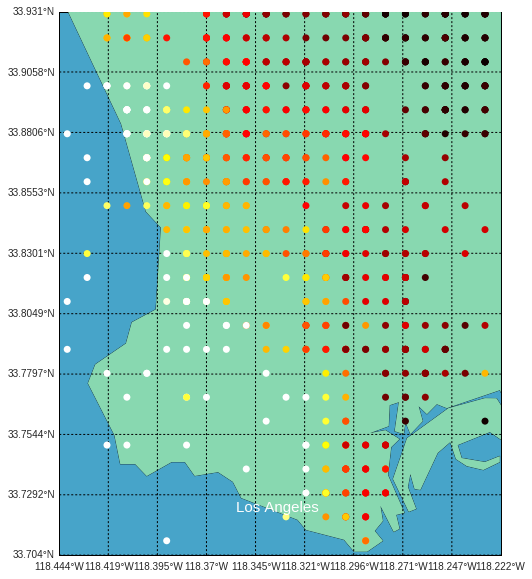

In [18]:
pl.figure(figsize=(10, 10))

m = bm.Basemap(
    llcrnrlon=lllon,
    llcrnrlat=lllat,
    urcrnrlon=urlon,
    urcrnrlat=urlat, 
    projection='merc',
    resolution='h'
)

m.drawcoastlines(linewidth=0.5)
m.drawmapboundary(fill_color='#47A4C9', zorder=1)
m.fillcontinents(color='#88D8B0',lake_color='#47A4C9', zorder=2)

parallels = np.linspace(lllat, urlat, 10)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# draw meridians
meridians = np.linspace(lllon, urlon, 10)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

colors = [pl.cm.hot(int((y - Y_s.min()) / (Y_s.max() - Y_s.min()) * 256)) for y in Y_s]
m.scatter(X_s[:, -1], X_s[:, -2], latlon=True, zorder=3, lw=0, c=colors)

pl.annotate('Los Angeles', xy=(0.4, 0.08), xycoords='axes fraction', color='white', size=15)

pl.show()

### Преобразование данных

* Нормализуем широту, долготу
* Логарифм от целевой переменной


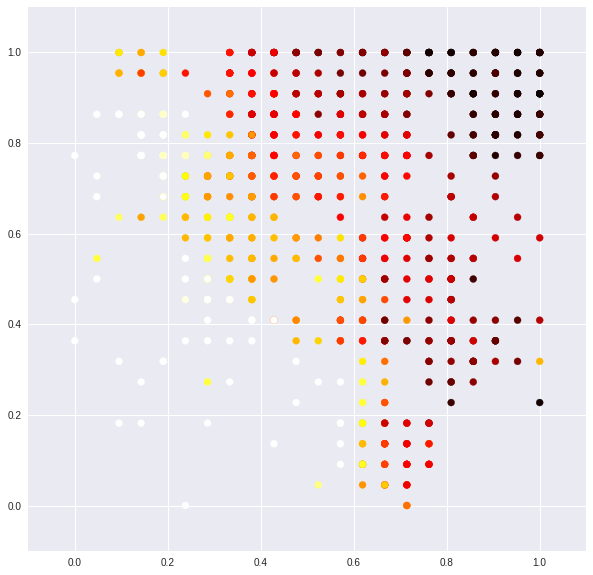

In [20]:
x_1 = (X_s[:, -1] - X_s[:, -1].min()) / (X_s[:, -1].max() - X_s[:, -1].min())
x_2 = (X_s[:, -2] - X_s[:, -2].min()) / (X_s[:, -2].max() - X_s[:, -2].min())

pl.figure(figsize=(10, 10))
pl.scatter(x_1, x_2, c=colors)
pl.xlim(-0.1, 1.1)
pl.ylim(-0.1, 1.1)
pl.show()

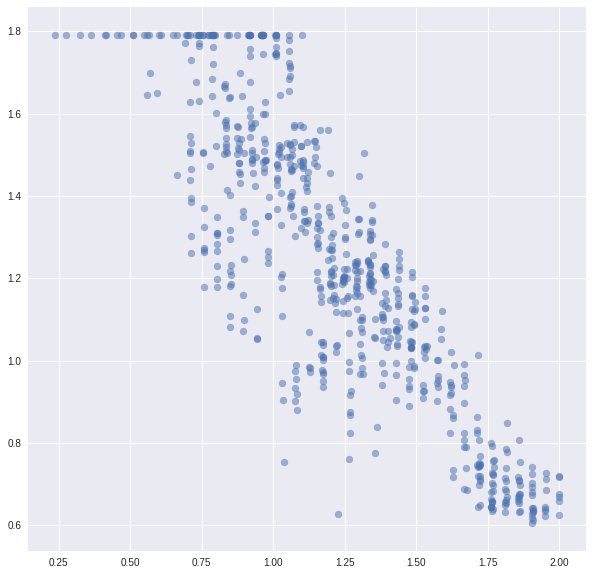

In [52]:
pl.figure(figsize=(10, 10))
pl.scatter(x_1 + x_2, np.log1p(Y_s), alpha=0.5)
pl.show()

## Метод ближайших соседей

### K-Nearest Neighbours

* Representation:
$$
h(\mathbf{x}) = \frac{1}{K} \sum_{\mathbf{x}_k \in N_K(\mathbf{x})} f(\mathbf{x}_k)
$$

* Evaluation: любая

* Optimization: не требуется


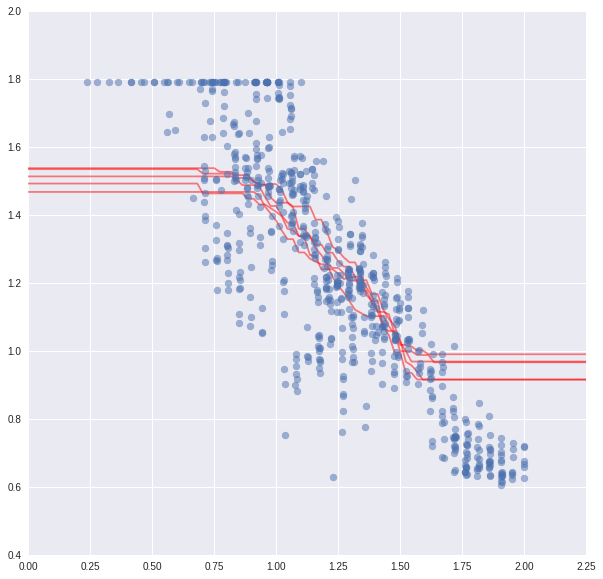

In [60]:
from sklearn.neighbors import KNeighborsRegressor

z = x_1 + x_2

pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

K = 30
for j in range(5):
    np.arange(z.shape[0])
    ind = np.random.choice(np.arange(z.shape[0]), size=int(z.shape[0] * 0.1))
    z_s = z[ind][:, np.newaxis]
    y_s = Y_s[ind]
    
    # научиться использовать KNeighborsRegressor
    
    # отобразить на графике кривую, соответствующую предсказанию KNN
    # для этого перебрать некоторое количество точек и посчитать для них значение функции
    
    # your code    
    # fix it:
    x_line = np.linspace(0.0, 2.25, 100)
    y_line = np.linspace(0.0, 2.25, 100)
    
    pl.plot(x_line, y_line, '-', c='r', alpha=0.5, zorder=1)    

pl.xlim(0.0, 2.25)
pl.ylim(0.4, 2.0)
pl.show()

## Классификация с помощью метода ближайших соседей

<img src="images/knn_cls.png">



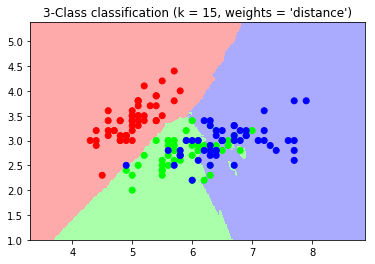

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# 1. создайте объект классификатора и обучите его на датасете iris
# используйте KNeighborsClassifier

# 2. c помощью np.meshgrid и np.arange создайте сетку
# для сетки выполните предсказание обученным классификатором

# 3. раскрасьте области предсказания классификатора с помощью plt.pcolormesh

# 4. нарисуйте точки из исходного датасета

plt.show()

## Representation: линейная модель

Идея: предположить, что искомая функция линейно зависит от признаков
$$
h(\mathbf{x}, \mathbf{w}) = \sum_{d=1}^D x_d w_d + w_0 = \mathbf{x}^T \mathbf{w} + w_0
$$
Добавим к $\mathbf{x}$ фиктивный компонент $x_0 = 1$
$$
h(\mathbf{x}, \mathbf{w}) = \sum_{d=0}^D x_d w_d = \mathbf{x}^T \mathbf{w},
$$
тогда для всего набора данных
$$
\mathbf{y}^T = \mathbf{x}^T \mathbf{w}
$$

или

$$
\mathbf{y} = \mathbf{w}^T \mathbf{x}
$$



$D$ - количество признаков  
$N$ - количество примеров в обучающем наборе

$\mathbf{x}$ - матрица размерности $D \times N$

$\mathbf{w}$ - вектор размерности $D$

$\mathbf{y}$ - вектор размерности $N$

## Evaluation: метод наименьших квадратов

Идея: выбрать веса так, чтобы сумма квадратов отклонений предсказаний от реальных значений была минимальной
$$
RSS(\mathbf{w}) = \sum_{n=1}^N (y_n - h(\mathbf{x}_n, \mathbf{w}))^2 = \sum_{n=1}^N (y_n - \mathbf{x}_n^T \mathbf{w})^2 \rightarrow \min_{\mathbf{w}}
$$



## Optimization: аналитически

$$
RSS(\mathbf{w}) = (Y - X^T \mathbf{w})^T (Y - X^T \mathbf{w})
$$
$$
\Downarrow
$$
$$
\mathbf{w} = (X^T X)^{-1} X^T Y
$$


## Нелинейные зависимости

Перейдем в новое пространство признаков
$$
\mathbf{x} = (x_1, x_2, \ldots, x_{D})
$$
$$
\downarrow
$$
$$
\mathbf{z} = (x_1, x_2, \ldots, x_D, x_1^2, x_1 x_2, x_1 x_3, \ldots,  x_{D-1} x_D, x_D^2, \ldots)
$$
и сможем приближать сложные нелинейные функции

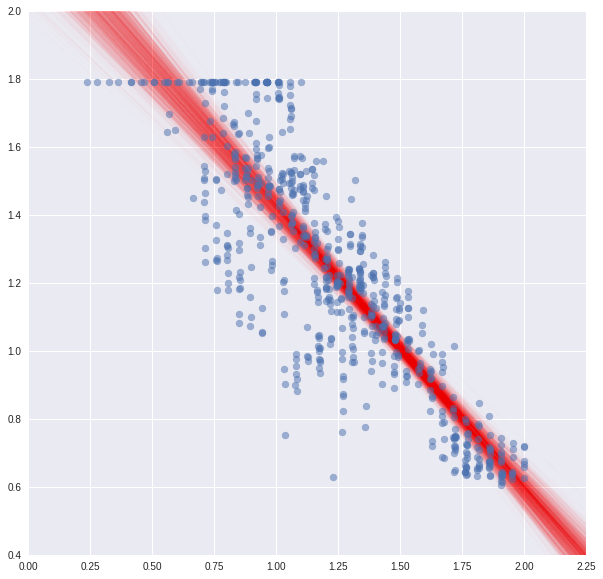

In [73]:
z = x_1 + x_2
pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

for j in range(1000):
    ind = np.random.choice(np.arange(z.shape[0]), size=int(z.shape[0] * 0.1))
    z_s = z[ind]
    y_s = Y_s[ind]
    
    # научиться использовать np.polyfit (подбор параметров)
    # реализовать линейную зависимость
    
    # отобразить на графике прямую, показывающую эту линейную зависимость
    # для этого перебрать некоторое количество точек и посчитать для них значение функции
    
    # your code    
    # fix it:
    x_line = np.linspace(0.0, 2.25, 100)
    y_line = np.linspace(0.0, 2.25, 100)
    
    pl.plot(x_line, y_line, '-', c='r', alpha=0.01, zorder=1)    

pl.xlim(0.0, 2.25)
pl.ylim(0.4, 2.0)
pl.show()

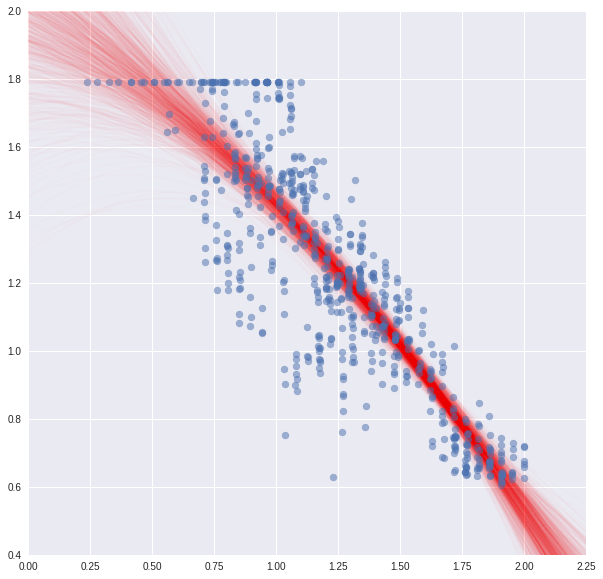

In [70]:
z = x_1 + x_2
pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

for j in range(1000):
    ind = np.random.choice(np.arange(z.shape[0]), size=int(z.shape[0] * 0.1))
    z_s = z[ind]
    y_s = Y_s[ind]
    # научиться использовать np.polyfit (подбор параметров)
    # реализовать квадратичную зависимость
    
    # отобразить на графике прямую, показывающую эту квадратичную зависимость
    # для этого перебрать некоторое количество точек и посчитать для них значение функции
    
    # your code    
    # fix it:
    x_line = np.linspace(0.0, 2.25, 100)
    y_line = np.linspace(0.0, 2.25, 100)
    
    pl.plot(x_line, y_line, '-', c='r', alpha=0.01, zorder=1)    

pl.xlim(0.0, 2.25)
pl.ylim(0.4, 2.0)
pl.show()

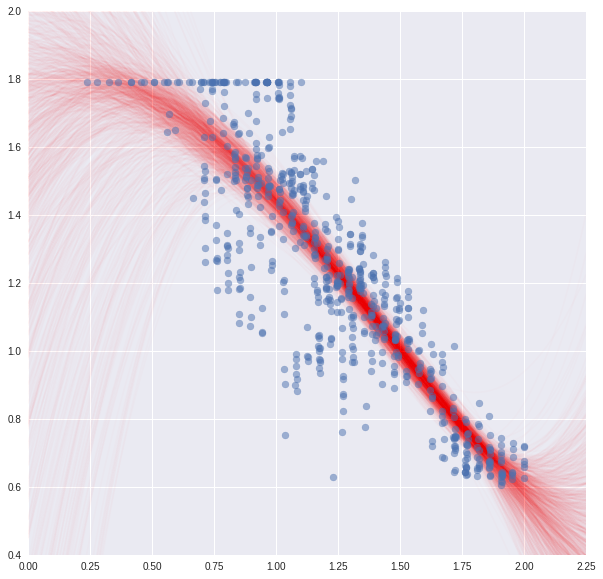

In [71]:
z = x_1 + x_2
pl.figure(figsize=(10, 10))
pl.scatter(z, np.log1p(Y_s), alpha=0.5, zorder=2)

for j in range(1000):
    ind = np.random.choice(np.arange(z.shape[0]), size=int(z.shape[0] * 0.1))
    z_s = z[ind]
    y_s = Y_s[ind]
    # научиться использовать np.polyfit (подбор параметров)
    # реализовать кубическую зависимость
    
    # отобразить на графике прямую, показывающую эту кубическую зависимость
    # для этого перебрать некоторое количество точек и посчитать для них значение функции
    
    # your code    
    # fix it:
    x_line = np.linspace(0.0, 2.25, 100)
    y_line = np.linspace(0.0, 2.25, 100)
    
    pl.plot(x_line, y_line, '-', c='r', alpha=0.01, zorder=1)    


pl.xlim(0.0, 2.25)
pl.ylim(0.4, 2.0)
pl.show()

## Эмпирический риск

* **Функция потерь** $\mathcal{L}(\mathbf{x}, y, \theta)$ - ошибка, которую для данного $\mathbf{x}$ дает модель $h(\mathbf{x}, \theta)$ по сравнению с реальным значением $y$

* **Эмпирический риск** - средняя ошибка на обучающей выборке
$$
Q(X, Y, \theta) = \frac{1}{N} \sum_{n=1}^N \mathcal{L}(\mathbf{x}_n, y_n, \theta)
$$

* **Задача** - найти значение $\theta^*$, минимизирующее эмпирический риск
$$
\theta^* = \theta^*(X, Y) = \text{argmin}_\theta Q(X, Y, \theta)
$$

## Некоторые функции потерь

* Индикатор ошибки
$$
\mathcal{L}(\mathbf{x}, y, \theta) = 0 \text{ if } h(\mathbf{x}, \theta) = y \text{ else } 1
$$
* Функция Минковского 
$$
\mathcal{L}(\mathbf{x}, y, \theta) = |y - h(\mathbf{x}, \theta)|^q
$$
Частные случаи: квадратичная $q = 2$, абсолютная ошибка $q = 1$
* Hinge
$$
\mathcal{L}(\mathbf{x}, y, \theta) = \max(0, 1 - y \times h(\mathbf{x}, \theta))
$$
* Информационная
$$
\mathcal{L}(\mathbf{x}, y, \theta) = - \log_2 p(y | \mathbf{x}, \theta)
$$


## Классификация с помощью метода наименьших квадратов

$$
\text{Пусть }\mathcal{Y} = \{0, 1\}, \text{ тогда } \begin{cases}
\text{классифицируем 1, если }h^*(\mathbf{x}) \geq 0.5 \\
\text{классифицируем 0, если }h*(\mathbf{x}) < 0.5
\end{cases}
$$

<img src="images/lr_cls.png">


## Переобучение

Метод наименьших квадратов

<img src="images/m1.png">
<img src="images/m2.png">
<img src="images/m3.png">
<img src="images/of.png">



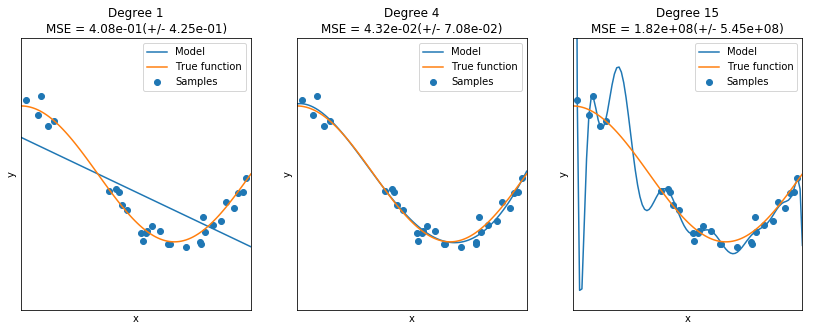

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X)
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


## Переобучение

### KNN

<img src="images/knn_cls.png">
<img src="images/knn_cls_1.png">
<img src="images/knn_tt.png">


## Оценка качетва классификации
<img src="images/learning.jpg">


## Как оценить различные модели?

**Идея**  
использовать долю неверно классифицированных объектов  
error rate)

**Важное замечание**  
error rate на обучающей выборке *НЕ* является хорошим показателем качества модели


## Решение 1: разделение выборки

Делим обучающую выборку на **тренировочную**, **валидационную** и **тестовую**
<img src="images/vtt.png">


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import neighbors

iris = datasets.load_iris()
print 'dataset: data shape {}, target shape {}'.format(iris.data.shape, iris.target.shape)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

print 'train data: data {}, target {}'.format(X_train.shape, y_train.shape)

print 'test data: data {}, target {}'.format(X_test.shape, y_test.shape)

clf = neighbors.KNeighborsClassifier().fit(X_train, y_train)
clf.score(X_test, y_test)                           

dataset: data shape (150, 4), target shape (150,)
train data: data (90, 4), target (90,)
test data: data (60, 4), target (60,)


0.94999999999999996

## Решение 2: скользящий контроль

(n-times) (stratified) cross-validation
<img src="images/cv.png">
частный случай: leave-one-out

In [16]:
from sklearn.model_selection import cross_val_score
clf = neighbors.KNeighborsClassifier()
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
Accuracy: 0.97 (+/- 0.05)


## Решение 3: bootstrap

выбираем в тренировочную выбоку $n$ объектов с возвращением
<img src="images/boot.png">
упражнение: найти математическое ожидание размера тестовой выборки.


## Метрики качества. Функции решения.

<table>
<tr>
    <td></td>
    <td></td>
    <td>Предсказанный</td>
    <td></td>
</tr>
<tr>
    <td></td>
    <td></td>
    <td>true</td>
    <td>false</td>
</tr>
<tr>
    <td>Действительный</td>
    <td>true</td>
    <td>TP</td>
    <td>FN</td>
</tr>
<tr>
    <td></td>
    <td>false</td>
    <td>FP</td>
    <td>TN</td>
</tr>
</table>


$$
success\;rate = accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$
$$
recall = TPR = \frac{TP}{TP + FN};\;\;precision = \frac{TP}{TP + FP}
$$
$$
FPR = \frac{FP}{FP + TN}
$$
$$
affinity = lift = \frac{precision}{p}
$$



## Receiver Operating Characteristic

$$
TPR = \frac{TP}{TP + FN};\;\;FPR = \frac{FP}{FP + TN}
$$

<img src="images/roc.png">


## Упражнение

**Простые классификаторы**  
В генеральной совокупности существуют объекты 3 классов, вероятность появления которых $p_1 < p_2 < p_3$. Первый классификатор относит все объекты к классу с большей вероятностью (то есть к третьему). Второй классификатор случайно относит объект к одному из классов в соответствии с базовым распределением. Рассчитать precision и recall, которые эти классификаторы дают для каждого из 3 классов.


## Метрики качества. Регрессия

$$
MSE = \frac 1 N \sum (h(\mathbf{x}_i) - y_i)^2, \;\; RMSE = \sqrt{MSE}
$$
$$
MAE =  \frac 1 N \sum |h(\mathbf{x}_i) - y_i|, \;\; RMAE = \sqrt{MAE}
$$



### Вопросы
### Пожалуйста, напишите отзыв о лекции